<a href="https://colab.research.google.com/github/sarmadsaleem333/Digit-Recognition-/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [5]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
  print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [7]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [9]:
print(X_train[10].shape)

(28, 28)


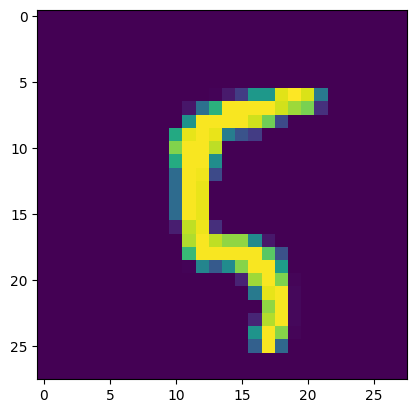

5


In [11]:
plt.imshow(X_train[100])
plt.show()

print(Y_train[100])

In [14]:
#scaling the dataset

X_train =X_train/255
X_test =X_test/255

**Building Neural Network**

In [15]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(50,activation="sigmoid")

])


In [16]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [18]:
model.fit(X_train,Y_train ,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2616 - accuracy: 0.9242
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2512 - accuracy: 0.9279
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2424 - accuracy: 0.9293
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2331 - accuracy: 0.9331
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2240 - accuracy: 0.9352
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2149 - accuracy: 0.9374
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2069 - accuracy: 0.9401
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1973 - accuracy: 0.9431
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1900 - accuracy: 0.9443
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.182

In [19]:
  loss,accuracy=model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1817 - accuracy: 0.9451


In [20]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [21]:
print(Y_pred.shape)

(10000, 50)


In [22]:
#this gives probability for each class
print(  Y_pred[0])

[2.7198467e-01 8.9535833e-04 9.9812835e-01 9.8632580e-01 2.5139898e-02
 4.0058905e-01 4.6507878e-08 9.9998856e-01 2.5174269e-01 8.3399206e-01
 3.6553954e-10 7.1162848e-10 8.9601915e-10 4.9972506e-09 1.7453815e-10
 1.1869307e-09 3.2096970e-10 3.1935998e-10 4.1020087e-10 1.0951592e-09
 2.8540831e-10 4.4040793e-10 6.9223677e-10 1.0528247e-09 1.2760653e-09
 3.9358969e-10 1.2193452e-09 1.4986248e-09 1.7130705e-09 2.3693707e-09
 1.6209399e-10 1.5586532e-09 1.3816384e-09 2.8323963e-10 5.6135546e-10
 3.0099909e-10 7.9494872e-10 7.9516099e-10 8.5020807e-10 3.7284322e-09
 4.9868409e-10 1.1985900e-09 9.3130031e-10 5.6778843e-10 4.1076850e-10
 4.6107898e-10 4.5448592e-10 6.6035050e-10 9.8756880e-10 3.8666617e-09]


In [23]:
label_for_first_img= np.argmax(Y_pred[0])
print(label_for_first_img)

7


In [25]:
#converting predication labels

Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 5, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 6, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 2, 5, 1, 7, 9, 3, 5, 4, 2, 0, 7, 1, 1, 2, 1, 

In [26]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 952    0    2    1    1    8   10    3    3    0]
 [   0 1112    4    2    1    2    3    2    9    0]
 [   7    3  965    8   11    3    7   10   15    3]
 [   0    1   14  931    1   37    0   12   10    4]
 [   1    2    6    0  927    0   11    3    5   27]
 [   7    3    2    7    6  830   13    3   15    6]
 [  10    3    4    0    8   11  918    0    4    0]
 [   0   10   15    5    4    1    0  982    0   11]
 [   4    6    5   10    9   25    7    9  893    6]
 [   8    9    2    8   20    8    0    6    7  941]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

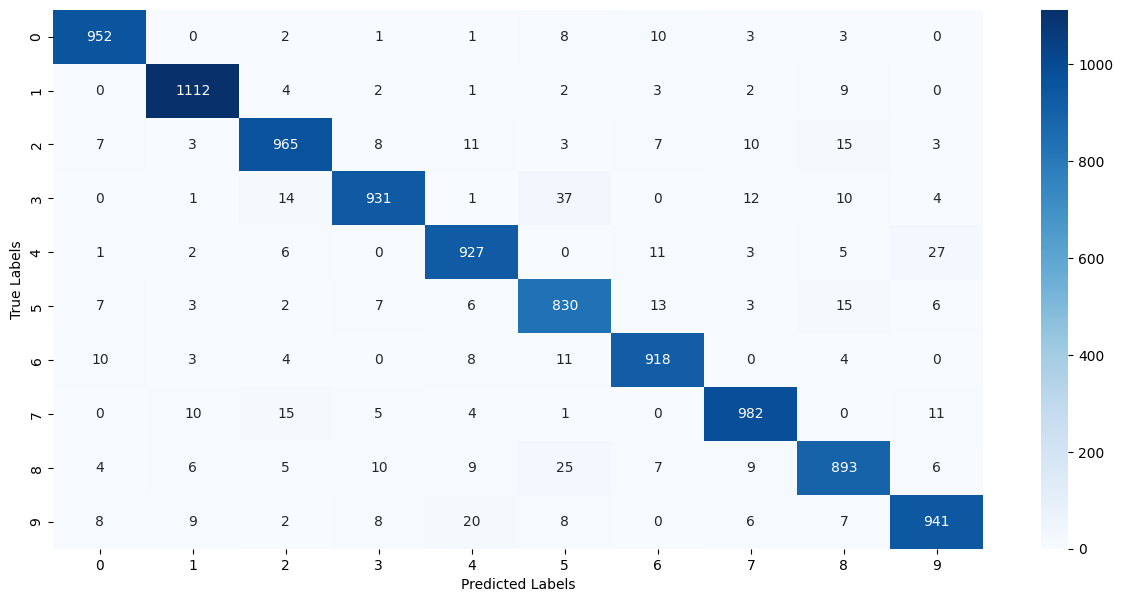

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt="d",cmap="Blues")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

In [92]:
input_image_path= '/content/twp.png'
input_image=cv2.imread(input_image_path)


In [93]:
type(input_image)

numpy.ndarray

In [94]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

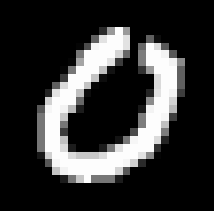

In [95]:
cv2_imshow(input_image)

In [96]:
input_image.shape

(211, 214, 3)

In [97]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [98]:
grayscale.shape

(211, 214)

In [99]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [100]:
input_image_resize.shape

(28, 28)

In [101]:
cv2_imshow(input_image_resize)

In [102]:
#scaling the input
input_image_resize=input_image_resize/255

In [103]:
image_reshaped=np.reshape(  input_image_resize,[1,28,28])

In [104]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 32ms/step
[[1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


In [105]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

0
